# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np
import nltk

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

nltk.download('stopwords', quiet=True)
sw = stopwords.words("english")

In [2]:
# change `data_location` to the location of the folder on your machine.
data_location = "/users/chandler/dropbox/teaching/repos/ads-tm-api-scrape/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [3]:
def descriptive_stats(tokens, num_tokens=5):
    """
    Given a list of tokens, print number of tokens, number of unique tokens, 
    number of characters, lexical diversity, and num_tokens most common tokens. 
    Return a list with the number of tokens, number of unique tokens, lexical 
    diversity, and number of characters. 
    """

    # Compute number of tokens
    num_tokens = len(tokens)

    # Compute number of unique tokens
    num_unique_tokens = len(set(tokens))

    # Compute number of characters
    num_characters = sum(len(token) for token in tokens)

    # Compute lexical diversity
    if num_tokens > 0:
        lexical_diversity = num_unique_tokens / num_tokens
    else:
        lexical_diversity = 0.0

    print(f"There are {num_tokens} tokens in the data.")
    print(f"There are {num_unique_tokens} unique tokens in the data.")
    print(f"There are {num_characters} characters in the data.")
    print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")

    # Print the num_tokens most common tokens
    if num_tokens > 0:
        common_tokens = Counter(tokens).most_common(num_tokens)
        print(f"The {num_tokens} most common tokens are:")
        for token, count in common_tokens:
            print(f"{token}: {count} occurrences")
    else:
        print("No tokens to display.")

    return [num_tokens, num_unique_tokens, lexical_diversity, num_characters]

In [4]:
def calculate_descriptive_statistics(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Calculate word count
    word_count = len(tokens)
    
    # Calculate average word length
    avg_word_length = sum(len(word) for word in tokens) / len(tokens)
    
    # Calculate vocabulary size
    vocabulary_size = len(set(tokens))
    
    # Return the descriptive statistics
    return {
        'word_count': word_count,
        'avg_word_length': avg_word_length,
        'vocabulary_size': vocabulary_size
    }

In [5]:
from collections import Counter

def descriptive_stats(tokens, num_tokens=5, verbose=True):
    """
    Given a list of tokens, print number of tokens, number of unique tokens, 
    number of characters, lexical diversity, and num_tokens most common tokens. 
    Return a list with the number of tokens, number of unique tokens, 
    lexical diversity, and number of characters.
    """

    # Calculate the number of tokens
    num_tokens = len(tokens)
    
    # Calculate the number of unique tokens
    num_unique_tokens = len(set(tokens))
    
    # Calculate the number of characters
    num_characters = sum(len(token) for token in tokens)
    
    # Calculate the lexical diversity
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens > 0 else 0.0
    
    if verbose:
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # Print the num_tokens most common tokens
        most_common_tokens = Counter(tokens).most_common(num_tokens)
        print(f"The {num_tokens} most common tokens are:")
        for token, frequency in most_common_tokens:
            print(f"{token}: {frequency}")
    
    return [num_tokens, num_unique_tokens, lexical_diversity, num_characters]


In [6]:
text = """here is some example text with other example text here in this text""".split()
stats = descriptive_stats(text, verbose=False)  # Call the function once and store the returned values

assert stats[0] == 13
assert stats[1] == 9
assert abs(stats[2] - 0.69) < 0.02
assert stats[3] == 55


Q: Why is it beneficial to use assertion statements in your code? 

A: It is beneficial to use assertion statements in your code is to identify logical errors and any invalid assumptions. Assertion statements help catch bugs early in the development process. They also document the code and help handle unexpected errors. They act as quality points.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [7]:
# Read in the lyrics data

import os
import pandas as pd

# Define the data locations with raw strings to handle backslashes properly
data_location = r"C:\Users\keevi\OneDrive\Documents\SDU\ADS-509\Week 2\M1 Results"
lyrics_folder = "lyrics/"

# Check if base directory exists
if not os.path.exists(data_location):
    print(f"Base directory does not exist: {data_location}")
else:
    print(f"Base directory exists: {data_location}")

# List directories in the lyrics folder
lyrics_path = os.path.join(data_location, lyrics_folder)
if not os.path.exists(lyrics_path):
    print(f"Lyrics directory does not exist: {lyrics_path}")
else:
    lyrics_dirs = os.listdir(lyrics_path)
    print("Lyrics directories:", lyrics_dirs)

# Read all lyrics files from each subdirectory
all_lyrics = []

for lyrics_dir in lyrics_dirs:
    dir_path = os.path.join(lyrics_path, lyrics_dir)
    if os.path.isdir(dir_path):
        files = os.listdir(dir_path)
        for file in files:
            file_path = os.path.join(dir_path, file)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    lyrics_data = f.read()
                    all_lyrics.append(lyrics_data)
            except FileNotFoundError as e:
                print(f"Error: {e}")
            except PermissionError as e:
                print(f"Error: {e}")

# Create a DataFrame for the lyrics data
lyrics_df = pd.DataFrame(all_lyrics, columns=['lyrics'])
print("Lyrics DataFrame:")
print(lyrics_df.head())


Base directory exists: C:\Users\keevi\OneDrive\Documents\SDU\ADS-509\Week 2\M1 Results
Lyrics directories: ['cher', 'robyn']
Lyrics DataFrame:
                                              lyrics
0  "88 Degrees"\n\n\n\nStuck in L.A., ain't got n...
1  "A Different Kind Of Love Song"\n\n\n\nWhat if...
2  "After All"\n\n\n\nWell, here we are again\nI ...
3  "Again"\n\n\n\nAgain evening finds me at your ...
4  "Alfie"\n\n\n\nWhat's it all about, Alfie?\nIs...


In [8]:
# Read in the twitter data

import os
import pandas as pd

# Define the data locations with raw strings to handle backslashes properly
data_location = r"C:\Users\keevi\OneDrive\Documents\SDU\ADS-509\Week 2\M1 Results"
twitter_folder = "twitter/"

# Check if base directory exists
if not os.path.exists(data_location):
    print(f"Base directory does not exist: {data_location}")
else:
    print(f"Base directory exists: {data_location}")

# List files in the twitter directory
twitter_path = os.path.join(data_location, twitter_folder)
if not os.path.exists(twitter_path):
    print(f"Twitter directory does not exist: {twitter_path}")
else:
    twitter_files = os.listdir(twitter_path)
    print("Twitter files:", twitter_files)

# Filter out non-text files from Twitter directory
twitter_files = [file for file in twitter_files if file.endswith('.txt')]

if twitter_files:
    twitter_file = os.path.join(twitter_path, twitter_files[0])

    # Read the Twitter data
    try:
        with open(twitter_file, 'r', encoding='utf-8') as f:
            twitter_data = f.readlines()

        # Create a DataFrame for the Twitter data
        twitter_df = pd.DataFrame(twitter_data, columns=['tweet'])
        print("\nTwitter DataFrame:")
        print(twitter_df.head())
    except FileNotFoundError as e:
        print(f"Error: {e}")
    except PermissionError as e:
        print(f"Error: {e}")
else:
    print("No text files found in the Twitter directory.")


Base directory exists: C:\Users\keevi\OneDrive\Documents\SDU\ADS-509\Week 2\M1 Results
Twitter files: ['.DS_Store', 'cher_followers.txt', 'cher_followers_data.txt', 'robynkonichiwa_followers.txt', 'robynkonichiwa_followers_data.txt']

Twitter DataFrame:
                   tweet
0                   id\n
1             35152213\n
2   742153090850164742\n
3  1496463006451974150\n
4           3366479914\n


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [9]:
punctuation = set(punctuation) # speeds up comparison

In [10]:
%config IPCompleter.greedy=True

In [11]:
def clean_and_tokenize(text):
    # Remove punctuation
    text = ''.join([char for char in text if char not in punctuation])
    # Split on whitespace and convert to lowercase
    tokens = text.lower().split()
    # Remove stopwords
    tokens = [token for token in tokens if token not in sw]
    return tokens

# Lyrics Data Cleaning and Tokenization

# List directories in the lyrics folder
lyrics_path = os.path.join(data_location, lyrics_folder)
if os.path.exists(lyrics_path):
    lyrics_dirs = os.listdir(lyrics_path)

    # Read and clean lyrics data
    all_lyrics = []
    for lyrics_dir in lyrics_dirs:
        dir_path = os.path.join(lyrics_path, lyrics_dir)
        if os.path.isdir(dir_path):
            files = os.listdir(dir_path)
            for file in files:
                file_path = os.path.join(dir_path, file)
                try:
                    with open(file_path, 'r', encoding='utf-8') as f:
                        lyrics_data = f.read()
                        cleaned_data = clean_and_tokenize(lyrics_data)
                        all_lyrics.append({
                            'lyrics': lyrics_data,
                            'cleaned_lyrics': cleaned_data
                        })
                except FileNotFoundError as e:
                    print(f"Error: {e}")
                except PermissionError as e:
                    print(f"Error: {e}")

    # Create a DataFrame for the lyrics data
    lyrics_df = pd.DataFrame(all_lyrics)
    print("Lyrics DataFrame:")
    print(lyrics_df.head())



Lyrics DataFrame:
                                              lyrics  \
0  "88 Degrees"\n\n\n\nStuck in L.A., ain't got n...   
1  "A Different Kind Of Love Song"\n\n\n\nWhat if...   
2  "After All"\n\n\n\nWell, here we are again\nI ...   
3  "Again"\n\n\n\nAgain evening finds me at your ...   
4  "Alfie"\n\n\n\nWhat's it all about, Alfie?\nIs...   

                                      cleaned_lyrics  
0  [88, degrees, stuck, la, aint, got, friends, h...  
1  [different, kind, love, song, world, crazy, sa...  
2  [well, guess, must, fate, weve, tried, deep, i...  
3  [evening, finds, door, ask, could, try, dont, ...  
4  [alfie, whats, alfie, moment, live, whats, sor...  


In [12]:
# Twitter Data Cleaning and Tokenization

# List files in the twitter directory
twitter_path = os.path.join(data_location, twitter_folder)
if os.path.exists(twitter_path):
    twitter_files = os.listdir(twitter_path)
    twitter_files = [file for file in twitter_files if file.endswith('.txt')]

    all_tweets = []
    if twitter_files:
        for file in twitter_files:
            file_path = os.path.join(twitter_path, file)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    twitter_data = f.readlines()
                    for tweet in twitter_data:
                        cleaned_tweet = clean_and_tokenize(tweet)
                        all_tweets.append({
                            'tweet': tweet.strip(),
                            'cleaned_tweet': cleaned_tweet
                        })
            except FileNotFoundError as e:
                print(f"Error: {e}")
            except PermissionError as e:
                print(f"Error: {e}")

    # Create a DataFrame for the Twitter data
    twitter_df = pd.DataFrame(all_tweets)
    print("\nTwitter DataFrame:")
    print(twitter_df.head())


Twitter DataFrame:
                 tweet          cleaned_tweet
0                   id                   [id]
1             35152213             [35152213]
2   742153090850164742   [742153090850164742]
3  1496463006451974150  [1496463006451974150]
4           3366479914           [3366479914]


## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [13]:
# Descriptive_stats for lyrics

def descriptive_stats(tokens, num_tokens=5, verbose=True):
    # Calculate the number of tokens
    total_tokens = len(tokens)
    
    # Calculate the number of unique tokens
    num_unique_tokens = len(set(tokens))
    
    # Calculate the number of characters
    num_characters = sum(len(token) for token in tokens)
    
    # Calculate the lexical diversity
    lexical_diversity = num_unique_tokens / total_tokens if total_tokens > 0 else 0.0
    
    if verbose:
        print(f"There are {total_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # Print the num_tokens most common tokens
        most_common_tokens = Counter(tokens).most_common(num_tokens)
        print(f"The {num_tokens} most common tokens are:")
        for token, frequency in most_common_tokens:
            print(f"{token}: {frequency}")
    
    return [total_tokens, num_unique_tokens, lexical_diversity, num_characters]

# List directories in the lyrics folder
lyrics_path = os.path.join(data_location, lyrics_folder)
if os.path.exists(lyrics_path):
    lyrics_dirs = os.listdir(lyrics_path)

    # Read and clean lyrics data
    all_lyrics = []
    for lyrics_dir in lyrics_dirs:
        dir_path = os.path.join(lyrics_path, lyrics_dir)
        if os.path.isdir(dir_path):
            files = os.listdir(dir_path)
            for file in files:
                file_path = os.path.join(dir_path, file)
                try:
                    with open(file_path, 'r', encoding='utf-8') as f:
                        lyrics_data = f.read()
                        cleaned_data = clean_and_tokenize(lyrics_data)
                        all_lyrics.append({
                            'artist': lyrics_dir,
                            'lyrics': lyrics_data,
                            'cleaned_lyrics': cleaned_data
                        })
                except FileNotFoundError as e:
                    print(f"Error: {e}")
                except PermissionError as e:
                    print(f"Error: {e}")

    # Create a DataFrame for the lyrics data
    lyrics_df = pd.DataFrame(all_lyrics)
    print("Lyrics DataFrame:")
    print(lyrics_df.head())

    # Perform descriptive statistics on cleaned lyrics data
    for index, row in lyrics_df.iterrows():
        print(f"\nDescriptive statistics for {row['artist']} lyrics:")
        stats = descriptive_stats(row['cleaned_lyrics'], verbose=True)
        print(stats)
else:
    print(f"Lyrics directory does not exist: {lyrics_path}")

Lyrics DataFrame:
  artist                                             lyrics  \
0   cher  "88 Degrees"\n\n\n\nStuck in L.A., ain't got n...   
1   cher  "A Different Kind Of Love Song"\n\n\n\nWhat if...   
2   cher  "After All"\n\n\n\nWell, here we are again\nI ...   
3   cher  "Again"\n\n\n\nAgain evening finds me at your ...   
4   cher  "Alfie"\n\n\n\nWhat's it all about, Alfie?\nIs...   

                                      cleaned_lyrics  
0  [88, degrees, stuck, la, aint, got, friends, h...  
1  [different, kind, love, song, world, crazy, sa...  
2  [well, guess, must, fate, weve, tried, deep, i...  
3  [evening, finds, door, ask, could, try, dont, ...  
4  [alfie, whats, alfie, moment, live, whats, sor...  

Descriptive statistics for cher lyrics:
There are 182 tokens in the data.
There are 82 unique tokens in the data.
There are 831 characters in the data.
The lexical diversity is 0.451 in the data.
The 5 most common tokens are:
cause: 9
hot: 8
im: 8
yeah: 8
88: 6
[182, 82, 

In [14]:
# Finding the lexical diversity of Cher and Robyn

# Reading lyrics data
lyrics_path = os.path.join(data_location, lyrics_folder)
if os.path.exists(lyrics_path):
    lyrics_dirs = os.listdir(lyrics_path)
    all_lyrics = []
    for lyrics_dir in lyrics_dirs:
        dir_path = os.path.join(lyrics_path, lyrics_dir)
        if os.path.isdir(dir_path):
            files = os.listdir(dir_path)
            for file in files:
                file_path = os.path.join(dir_path, file)
                try:
                    with open(file_path, 'r', encoding='utf-8') as f:
                        lyrics_data = f.read()
                        cleaned_data = clean_and_tokenize(lyrics_data)
                        all_lyrics.append({
                            'artist': lyrics_dir,
                            'lyrics': lyrics_data,
                            'cleaned_lyrics': cleaned_data
                        })
                except FileNotFoundError as e:
                    print(f"Error: {e}")
                except PermissionError as e:
                    print(f"Error: {e}")

    # Create a DataFrame for the lyrics data
    lyrics_df = pd.DataFrame(all_lyrics)
    print("Lyrics DataFrame:")
    print(lyrics_df.head())

    # Perform descriptive statistics on cleaned lyrics data
    for index, row in lyrics_df.iterrows():
        print(f"\nDescriptive statistics for {row['artist']} lyrics:")
        stats = descriptive_stats(row['cleaned_lyrics'], verbose=True)
        print(stats)
else:
    print(f"Lyrics directory does not exist: {lyrics_path}")

# Calculate average lexical diversity for each artist
artists = lyrics_df['artist'].unique()
for artist in artists:
    artist_tokens = []
    for _, row in lyrics_df[lyrics_df['artist'] == artist].iterrows():
        artist_tokens.extend(row['cleaned_lyrics'])
    print(f"\nOverall descriptive statistics for {artist} lyrics:")
    stats = descriptive_stats(artist_tokens, verbose=True)
    print(stats)


Lyrics DataFrame:
  artist                                             lyrics  \
0   cher  "88 Degrees"\n\n\n\nStuck in L.A., ain't got n...   
1   cher  "A Different Kind Of Love Song"\n\n\n\nWhat if...   
2   cher  "After All"\n\n\n\nWell, here we are again\nI ...   
3   cher  "Again"\n\n\n\nAgain evening finds me at your ...   
4   cher  "Alfie"\n\n\n\nWhat's it all about, Alfie?\nIs...   

                                      cleaned_lyrics  
0  [88, degrees, stuck, la, aint, got, friends, h...  
1  [different, kind, love, song, world, crazy, sa...  
2  [well, guess, must, fate, weve, tried, deep, i...  
3  [evening, finds, door, ask, could, try, dont, ...  
4  [alfie, whats, alfie, moment, live, whats, sor...  

Descriptive statistics for cher lyrics:
There are 182 tokens in the data.
There are 82 unique tokens in the data.
There are 831 characters in the data.
The lexical diversity is 0.451 in the data.
The 5 most common tokens are:
cause: 9
hot: 8
im: 8
yeah: 8
88: 6
[182, 82, 

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: If we left stopwords in the data the top 5 words would more than likely find frequently occurring english words such as "the", "is", "in", "and", and "to".

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: My prior beliefs about the lexical diversity between the artists are that the different musical genres might be an influence. Since, lexical diversity is a measure of different words appear in text, it would make sense that the musical genre's of Hip Hop or Folk music would have a higher lexical diversity than Pop which tends to use more repetitive and simpler language. Both Cher and Robyn are primarily pop artists and therefore might have lower lexical diversity. The difference or lack there of in lexical diversity between the artists do conform to my prior beliefs. Since they are both pop singers there would be little difference in their lexical diversity.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [15]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [20]:
import os
import re
import emoji
from collections import Counter

# Define the directory path
twitter_directory = r"C:\Users\keevi\OneDrive\Documents\SDU\ADS-509\Week 2\M1 Results\twitter"

# Helper function to extract emojis from text
def extract_emojis(text):
    return [char for char in text if emoji.is_emoji(char)]

# Dictionary to store emoji counts
emoji_counts = Counter()

# Traverse the directory
for root, dirs, files in os.walk(twitter_directory):
    for file in files:
        # Read the file content
        file_path = os.path.join(root, file)
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
            tweets = f.readlines()
        
        # Extract emojis from each tweet and update the counts
        for tweet in tweets:
            emojis = extract_emojis(tweet)
            emoji_counts.update(emojis)

# Print the ten most common emojis
print("Ten most common emojis used:")
for emoji_char, count in emoji_counts.most_common(10):
    print(f"{emoji_char}: {count}")

Ten most common emojis used:
❤: 100141
🌈: 72377
♥: 52308
🏳: 51815
✨: 49063
💙: 32250
🌊: 31591
🏻: 26946
✌: 23458
💜: 22548


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [21]:
import os
import re
from collections import Counter

# Define the directory path
twitter_directory = r"C:\Users\keevi\OneDrive\Documents\SDU\ADS-509\Week 2\M1 Results\twitter"

# Helper function to extract hashtags from text
def extract_hashtags(text):
    return re.findall(r'#\w+', text)

# Dictionary to store hashtag counts by artist
hashtag_counts_by_artist = {}

# Traverse the directory
for root, dirs, files in os.walk(twitter_directory):
    for file in files:
        # Read the file content
        file_path = os.path.join(root, file)
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
            tweets = f.readlines()
        
        # Extract hashtags from each tweet and update the counts for the artist
        artist = os.path.splitext(file)[0]
        hashtag_counts = Counter()
        for tweet in tweets:
            hashtags = extract_hashtags(tweet)
            hashtag_counts.update(hashtags)
        
        # Store the hashtag counts for the artist
        hashtag_counts_by_artist[artist] = hashtag_counts

# Print the ten most common hashtags by artist
for artist, hashtag_counts in hashtag_counts_by_artist.items():
    print(f"\nTen most common hashtags for {artist}:")
    for hashtag, count in hashtag_counts.most_common(10):
        print(f"{hashtag}: {count}")



Ten most common hashtags for .DS_Store:

Ten most common hashtags for cher_followers:

Ten most common hashtags for cher_followers_data:
#BLM: 10100
#Resist: 6161
#BlackLivesMatter: 4888
#resist: 3860
#FBR: 3330
#1: 3111
#TheResistance: 3044
#blacklivesmatter: 2738
#Resistance: 1953
#RESIST: 1878

Ten most common hashtags for robynkonichiwa_followers:

Ten most common hashtags for robynkonichiwa_followers_data:
#BlackLivesMatter: 356
#BLM: 345
#1: 228
#blacklivesmatter: 222
#music: 175
#Music: 114
#EDM: 87
#LGBTQ: 76
#blm: 60
#TeamFollowBack: 59


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [22]:
import os
from collections import Counter

# Define the directory path
lyrics_directory = r"C:\Users\keevi\OneDrive\Documents\SDU\ADS-509\Week 2\M1 Results\lyrics"

# Helper function to extract song titles
def extract_song_titles(lyrics):
    return [line.strip() for line in lyrics.split('\n') if line.strip()]

# Dictionary to store word counts in song titles by artist
word_counts_by_artist = {}

# Traverse the directory
for root, dirs, files in os.walk(lyrics_directory):
    for file in files:
        # Read the file content
        file_path = os.path.join(root, file)
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
            lyrics = f.read()
        
        # Extract the artist name from the file name
        artist = os.path.splitext(file)[0]
        
        # Extract song titles from the lyrics
        song_titles = extract_song_titles(lyrics)
        
        # Count word occurrences in song titles
        word_counts = Counter()
        for title in song_titles:
            words = title.split()
            word_counts.update(words)
        
        # Store the word counts for the artist
        word_counts_by_artist[artist] = word_counts

# Print the five most common words in song titles by artist
for artist, word_counts in word_counts_by_artist.items():
    print(f"\nFive most common words in song titles for {artist}:")
    for word, count in word_counts.most_common(5):
        print(f"{word}: {count}")



Five most common words in song titles for cher_88degrees:
the: 19
so: 16
to: 11
is: 8
I'm: 8

Five most common words in song titles for cher_adifferentkindoflovesong:
of: 18
kind: 15
love: 15
song: 14
is: 10

Five most common words in song titles for cher_afterall:
to: 15
all: 15
and: 13
After: 12
you: 10

Five most common words in song titles for cher_again:
you: 6
me: 4
If: 3
again: 3
I: 3

Five most common words in song titles for cher_alfie:
it: 5
we: 5
Alfie.: 5
the: 4
to: 4

Five most common words in song titles for cher_aliveagain:
I: 22
the: 10
to: 8
a: 7
need: 7

Five most common words in song titles for cher_allbecauseofyou:
of: 19
because: 17
you: 15
I: 11
All: 10

Five most common words in song titles for cher_allireallywanttodo:
you: 37
or: 14
with: 12
I: 11
be: 10

Five most common words in song titles for cher_allornothing:
you: 17
Baby: 10
it's: 10
all: 10
or: 10

Five most common words in song titles for cher_amiblue:
I: 16
was: 7
I'm: 7
Am: 6
blue: 6

Five most commo

### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


In [28]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [29]:
import matplotlib

artist
Cher     Axes(0.125,0.11;0.775x0.77)
Robyn    Axes(0.125,0.11;0.775x0.77)
Name: length, dtype: object

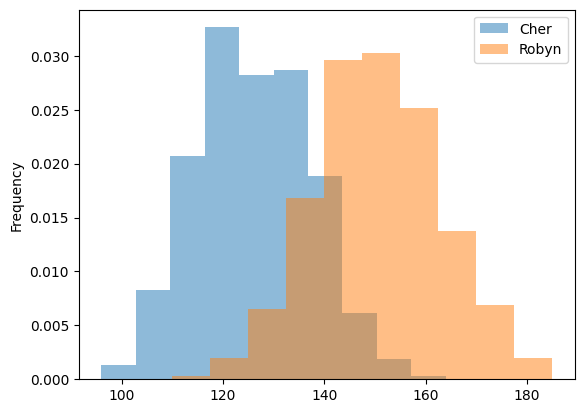

In [31]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Cher'] * num_replicates + ['Robyn']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: The regular expression '\s+' matches a whitespace and substituting with empty string.


In [32]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

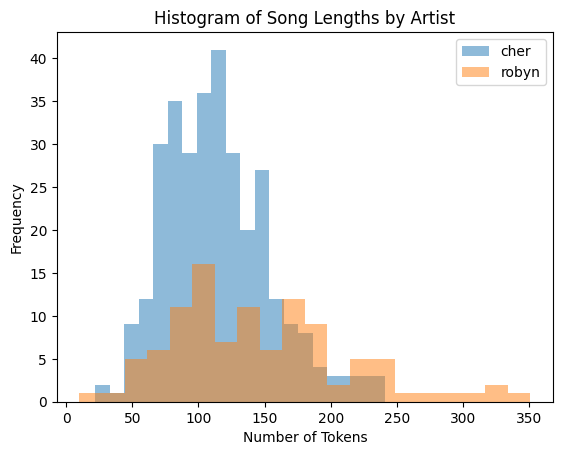

In [33]:
# Create histograms for each artist
for artist, group in lyrics_df.groupby('artist'):
    plt.hist(group['cleaned_lyrics'].apply(len), bins=20, alpha=0.5, label=artist)

# Add labels and title
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Histogram of Song Lengths by Artist')
plt.legend()

# Show plot
plt.show()
